In [1]:
import pandas as pd 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt 
import os 
import seaborn as sns 
sns.set_style("darkgrid")

%matplotlib inline 

In [2]:
root_dir  = os.path.abspath('.')
data_dir  = os.path.join(root_dir, 'data')
train     = os.path.join(data_dir,'car data.csv')

In [3]:
train_df = pd.read_csv(train)
train_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
train_df.shape

(301, 9)

In [5]:
# CATEGORICAL FEATURES 
#FUEL_TYPE, SELLER-TYPE,TRANSMISSION
print(train_df['Fuel_Type'].unique())
print(train_df['Seller_Type'].unique())
print(train_df['Transmission'].unique())
print(train_df['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [6]:
#Missing and Null values
train_df.isnull().sum()/len(train_df)

Car_Name         0.0
Year             0.0
Selling_Price    0.0
Present_Price    0.0
Kms_Driven       0.0
Fuel_Type        0.0
Seller_Type      0.0
Transmission     0.0
Owner            0.0
dtype: float64

In [7]:
train_df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
train_df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [9]:
final_dataset = train_df[[ 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
#Adding new feature
from datetime import datetime
now = datetime.now()
final_dataset['Current_Year'] = now.year
final_dataset['Current_Year'].head()

0    2020
1    2020
2    2020
3    2020
4    2020
Name: Current_Year, dtype: int64

In [11]:
final_dataset['age_of_car'] = final_dataset['Current_Year'] - final_dataset['Year']


In [12]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,age_of_car
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [13]:
#Since we have derived Age of the car, we can now drop the variables year and current_year. 
final_dataset.drop(columns=['Year','Current_Year'], axis=1, inplace=True)

In [14]:
final_dataset = pd.get_dummies(final_dataset, drop_first=True)

In [15]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,age_of_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [16]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,age_of_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
age_of_car,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


<Figure size 1440x1080 with 0 Axes>

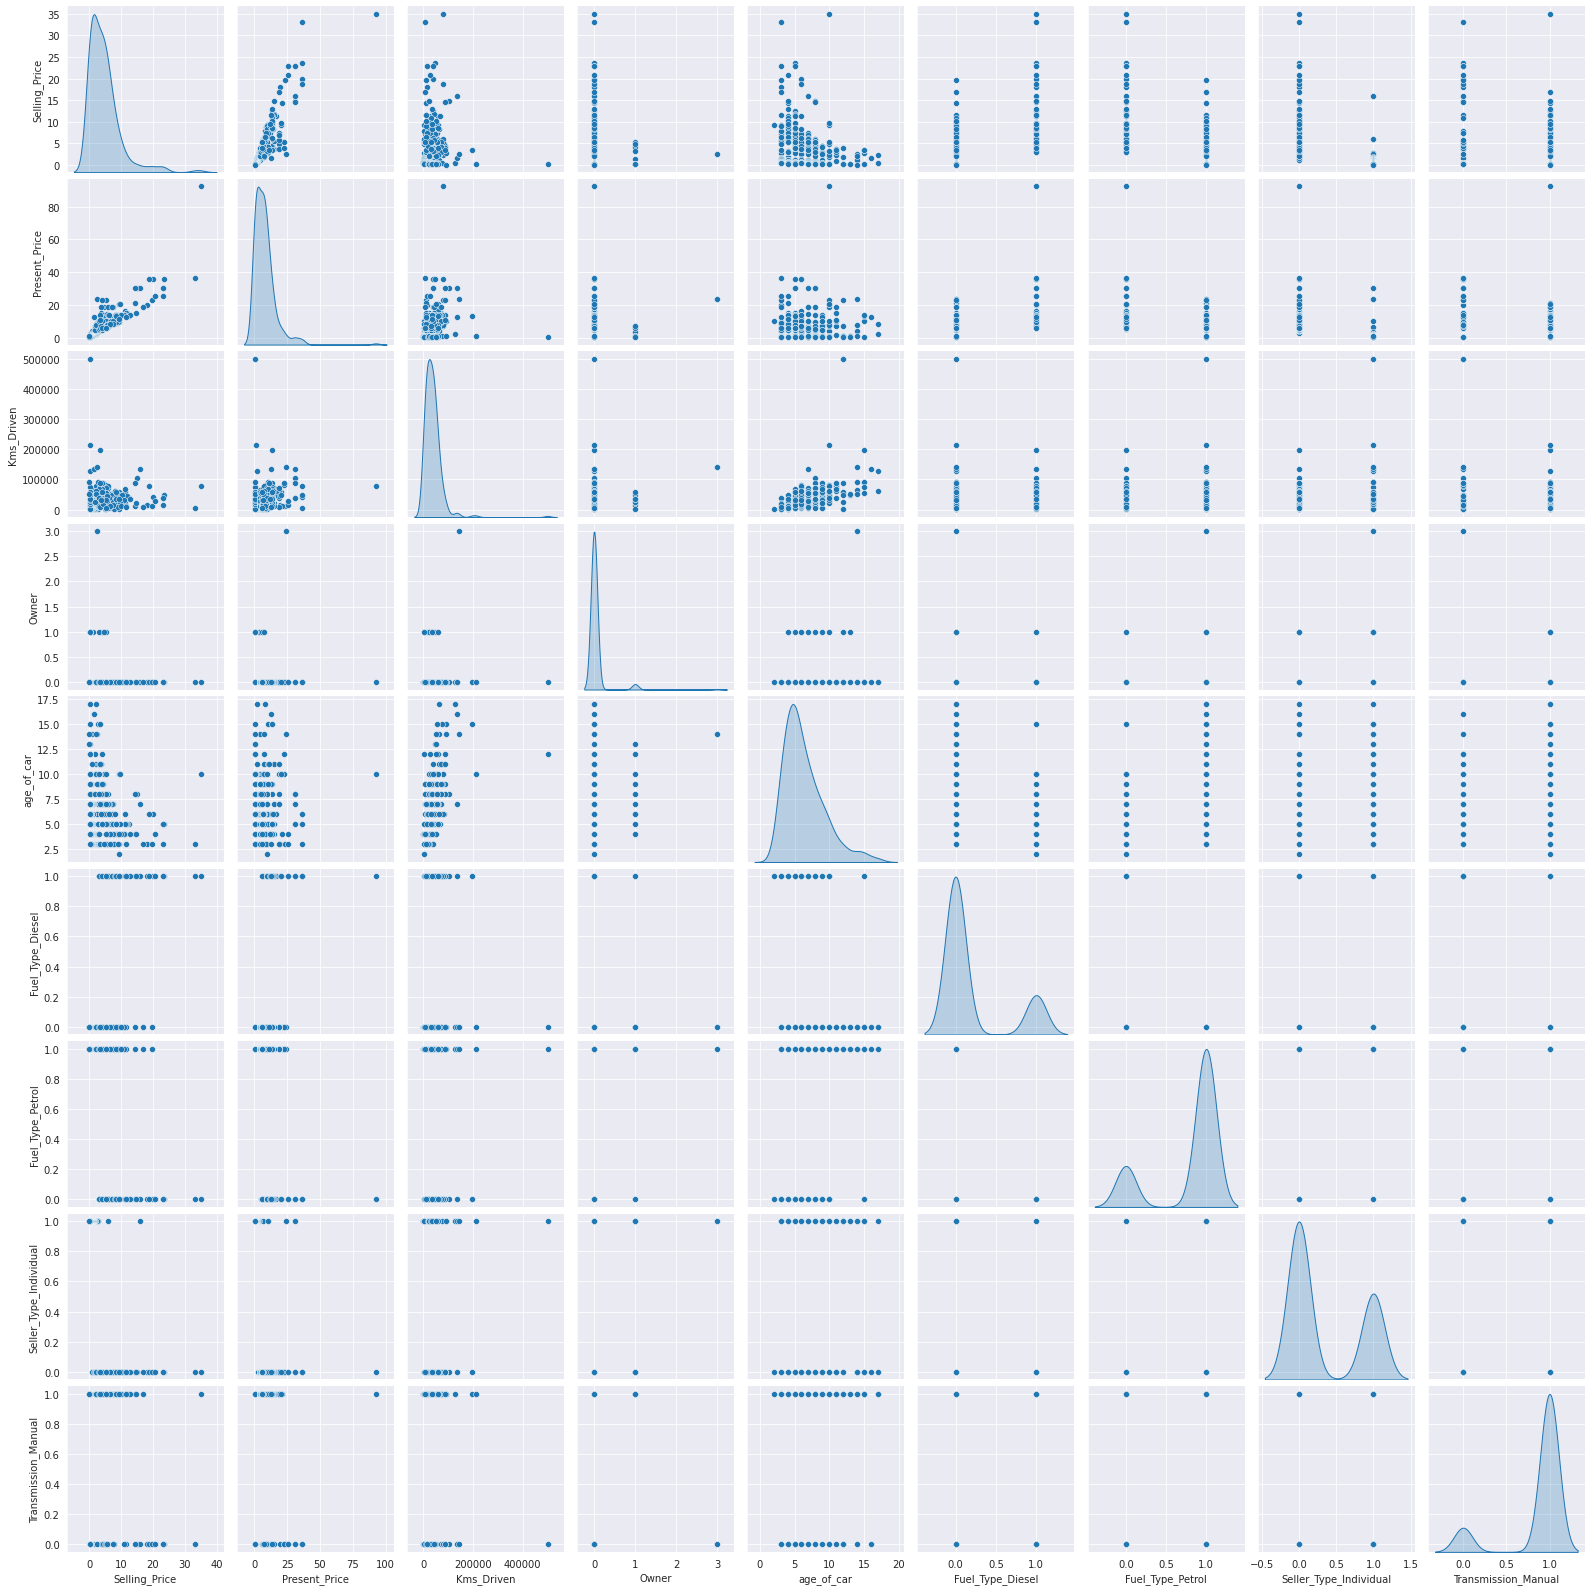

In [17]:
plt.figure(figsize=(20,15))
sns.pairplot(final_dataset, diag_kind="kde",)
plt.show()

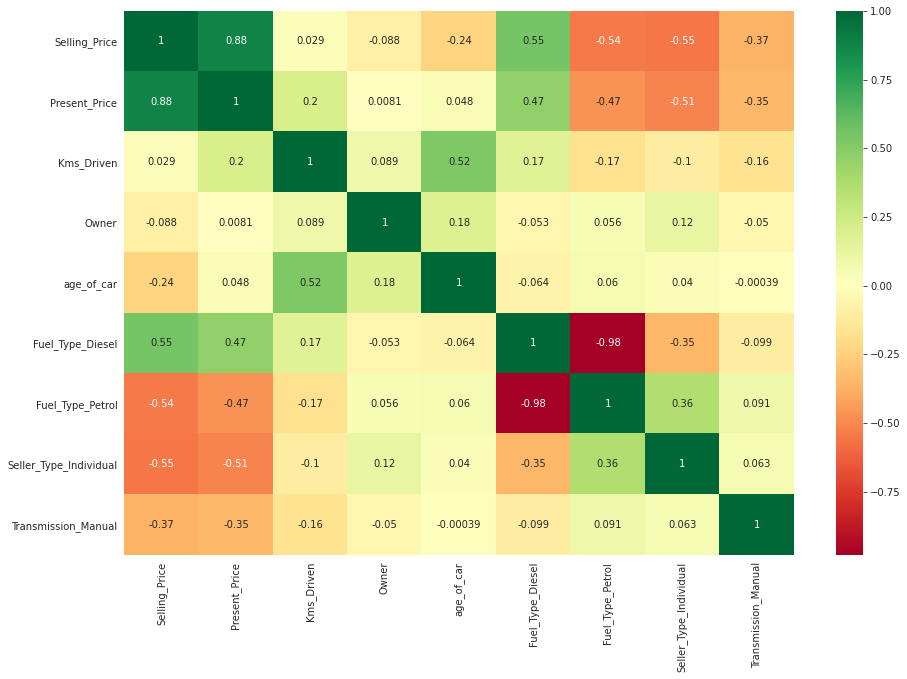

In [18]:
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,10))
sns.heatmap(final_dataset[top_corr_features].corr(), annot=True, cmap='RdYlGn')
plt.show()

### Dark red shows that the features are negatively correlated and dark green showns that the features are highly correlated.

In [19]:
X = final_dataset.iloc[:, 1:]
y = final_dataset.iloc[:,0]

In [20]:
### Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [21]:
print(model.feature_importances_)

[0.37603547 0.04233954 0.00039784 0.07813479 0.22323378 0.01172056
 0.13431158 0.13382644]


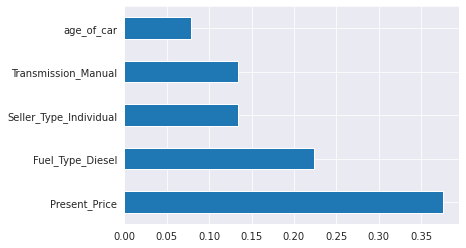

In [22]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

# CREATING A BASE MODEL 

In [23]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

import pickle 

In [24]:

X_train,X_test,y_train, y_test = train_test_split(X,y, test_size =.2, random_state = 42)

In [25]:
X_train.shape

(240, 8)

In [52]:
X_train.head()

,Present_Price,Kms_Driven,Owner,age_of_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
184,0.750,26000,1,12,0,1,1,1
132,0.950,3500,0,3,0,1,1,1
194,0.787,50000,0,12,0,1,1,1
75,6.800,36000,0,5,0,1,0,1
111,1.500,8700,0,4,0,1,1,1


In [53]:
#cross validation
CV=5

#variable to capture r2 scores 
R2=[]

#variable to capture cross val metrics of the model 
MODELCV=[]

MODELALGO=[]

def buildModel(model_Algorithm, trainX, trainY, testX, testY, model_name=None):
    MODELALGO.append(model_name)
    model_Algorithm.fit(trainX, trainY)
    predictions = model_Algorithm.predict(testX)
    r2 = r2_score(testY,predictions)
    R2.append(r2)
    
    cross_val=cross_val_score(model_Algorithm,trainX,trainY,cv=CV)
    MODELCV.append(cross_val.mean())
    
    print(model_Algorithm,":\n") 
    print("r_2 score :",r2,"\n")
    print("CV scores:",cross_val,"\n")
    print("CV scores mean:",cross_val.mean())
    
    test_index = y_test.reset_index()['Selling_Price']
    pred = pd.DataFrame(predictions, columns=['Selling_Price_Pred']).reset_index()['Selling_Price_Pred']
    combined = pd.concat([test_index, pred], axis=1)
    
    print(combined.head())
    
    #open a file to store the model
    pklFile = open(model_name+'.pkl','wb')
    
    #dumping model information to the file
    pickle.dump(model_Algorithm, pklFile)
    
    return combined

# SIMPLE LINEAR REGRESSION

In [27]:
linModel = LinearRegression(fit_intercept=True)
model = buildModel(linModel, X_train, y_train, X_test, y_test, 'LinearRegression')

LinearRegression() :

r_2 score : 0.8489813024899083 

CV scores: [0.85420812 0.84855467 0.81145104 0.83374004 0.90176495] 

CV scores mean: 0.8499437620235165
   Selling_Price  Selling_Price_Pred
0           0.35            2.955343
1          10.11            8.178939
2           4.95            6.454273
3           0.15           -1.424175
4           6.95            9.088899


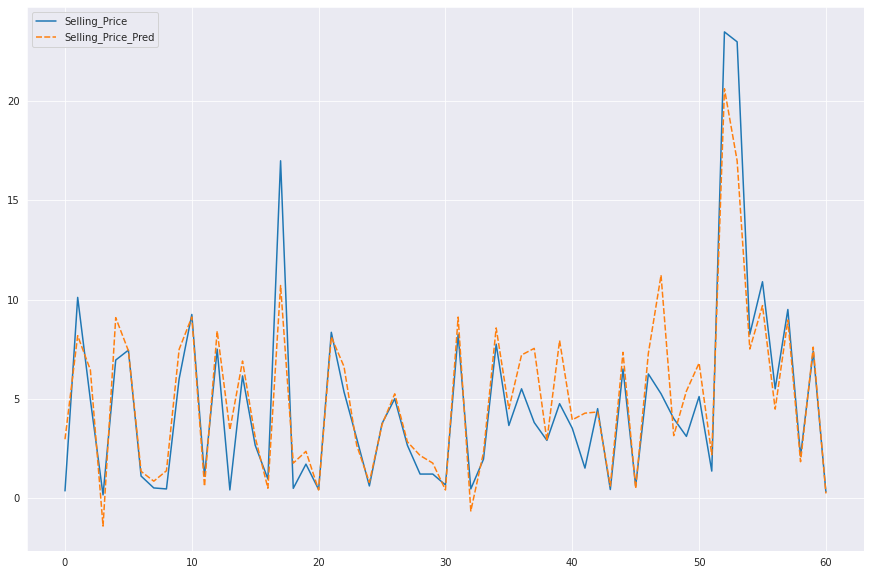

In [28]:
plt.figure(figsize=(15,10))
sns.lineplot(data=model)
plt.show()

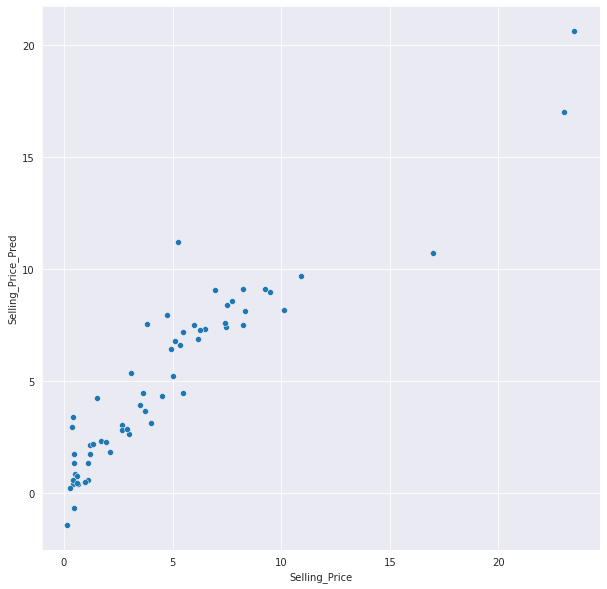

In [29]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = model['Selling_Price'], y=model['Selling_Price_Pred'])
plt.show()

<Figure size 1080x720 with 0 Axes>

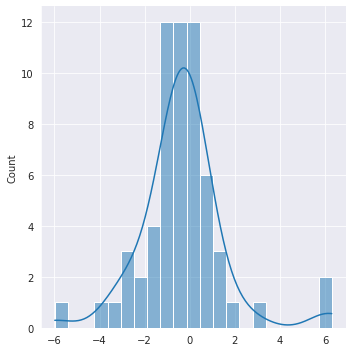

In [30]:
plt.figure(figsize=(15,10))
sns.displot(model['Selling_Price']-model['Selling_Price_Pred'],kde=True)
plt.show()

# RIDGE REGRESSION

In [31]:
#Tuning Alpha for RIDGE
paramGrid = {
    "alpha": np.logspace(np.log10(0.02) , np.log10(2.0) , num=20),
    "normalize":[True, False],
}

ridgeGrid = GridSearchCV(estimator=Ridge(), param_grid=paramGrid, cv=5)
ridgeGrid.fit(X_train, y_train)

print(ridgeGrid.best_score_)
print(ridgeGrid.best_estimator_)


0.8594223568795712
Ridge(alpha=0.08562664797438788, normalize=True)


In [32]:
ridge = Ridge(**ridgeGrid.best_params_)
model = buildModel(ridge, X_train, y_train, X_test, y_test,'RidgeRegression')

Ridge(alpha=0.08562664797438788, normalize=True) :

r_2 score : 0.8371147749639819 

CV scores: [0.86419949 0.90650919 0.81092999 0.81732853 0.89814459] 

CV scores mean: 0.8594223568795712
   Selling_Price  Selling_Price_Pred
0           0.35            3.190640
1          10.11            7.773710
2           4.95            6.728063
3           0.15           -1.153388
4           6.95            8.543492


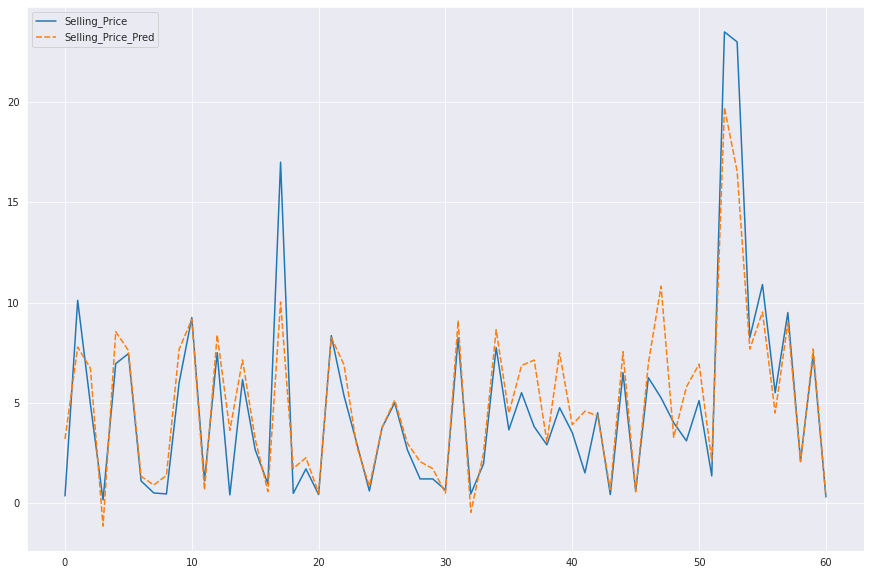

In [33]:
plt.figure(figsize=(15,10))
sns.lineplot(data=model)
plt.show()

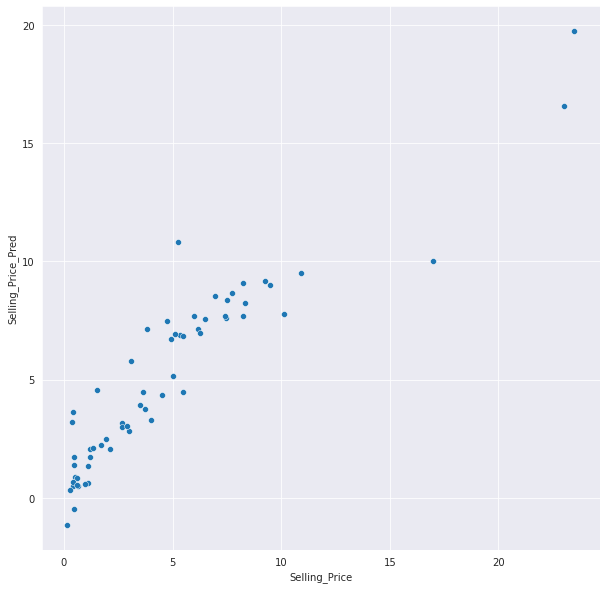

In [34]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = model['Selling_Price'], y=model['Selling_Price_Pred'])
plt.show()

<Figure size 1080x720 with 0 Axes>

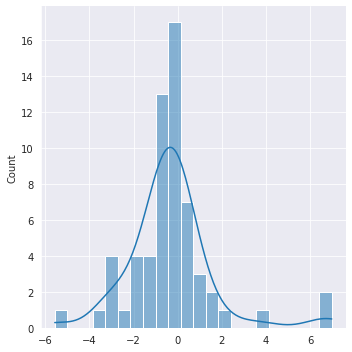

In [35]:
plt.figure(figsize=(15,10))
sns.displot(model['Selling_Price']-model['Selling_Price_Pred'],kde=True)
plt.show()

# LASSO REGRESSION

In [36]:
#Tuning Alpha for RIDGE
paramGrid = {
    "alpha": np.logspace(np.log10(0.02) , np.log10(2.0) , num=20),
    "normalize":[True, False],
}

lasGrid = GridSearchCV(estimator=Lasso(), param_grid=paramGrid, cv=5)
lasGrid.fit(X_train, y_train)

print(lasGrid.best_score_)
print(lasGrid.best_estimator_)

0.8472488079790343
Lasso(alpha=0.020000000000000004)


In [37]:
lasso = Lasso(**lasGrid.best_params_)
model = buildModel(lasso, X_train, y_train, X_test, y_test,'LassoRegression')

Lasso(alpha=0.020000000000000004) :

r_2 score : 0.8519475695840111 

CV scores: [0.85384574 0.83059125 0.81279007 0.83385574 0.90516124] 

CV scores mean: 0.8472488079790343
   Selling_Price  Selling_Price_Pred
0           0.35            2.773986
1          10.11            8.239520
2           4.95            6.314701
3           0.15           -1.125305
4           6.95            9.178112


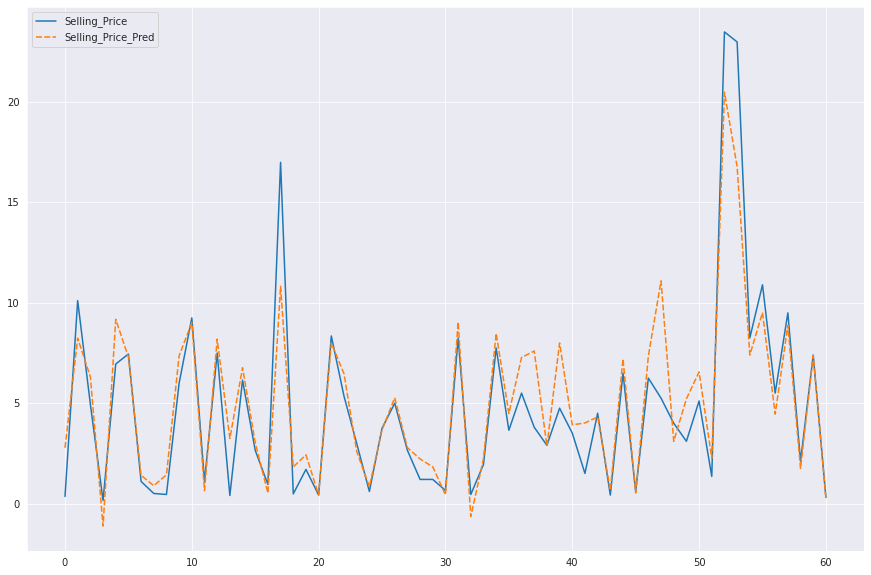

In [38]:
plt.figure(figsize=(15,10))
sns.lineplot(data=model)
plt.show()

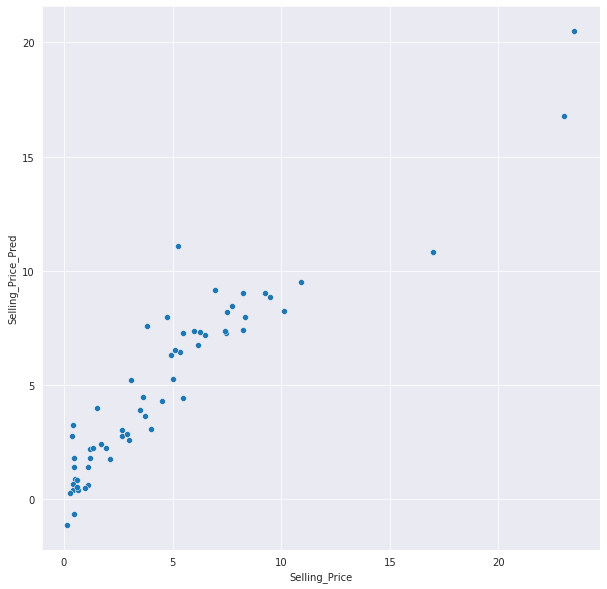

In [39]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = model['Selling_Price'], y=model['Selling_Price_Pred'])
plt.show()

<Figure size 1080x720 with 0 Axes>

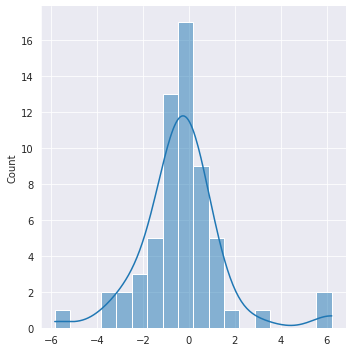

In [40]:
plt.figure(figsize=(15,10))
sns.displot(model['Selling_Price']-model['Selling_Price_Pred'],kde=True)
plt.show()

# RANDOM FOREST REGRESSOR

In [41]:
###HYPERPARAMETERS FOR RANDOMFORESTREGRESSOR
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30, num=6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [42]:
param_grid={
    "n_estimators":n_estimators,
    "max_features":max_features,
    "max_depth":max_depth,
    "min_samples_split":min_samples_split,
    "min_samples_leaf":min_samples_leaf,
}
print(param_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [43]:
rf_random = RandomizedSearchCV(estimator=RandomForestRegressor(), 
                               param_distributions=param_grid, 
                               scoring = 'r2',
                               n_iter=10,
                               cv=5,
                               random_state=42,
                               n_jobs=1,
                               verbose=1,
                              )

In [44]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.4min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='r2', verbose=1)

In [45]:
predictions = rf_random.predict(X_test)
predictions

array([ 0.79484, 10.02837,  5.26463,  0.32495,  6.91643,  6.31375,
        1.02129,  0.61334,  0.50106,  6.2757 , 10.70667,  0.90844,
        7.48038,  0.6118 ,  5.4114 ,  3.01443,  0.98063, 11.08049,
        0.65229,  1.45217,  0.56219,  8.63393,  5.99214,  2.78764,
        0.5449 ,  3.61505,  5.2173 ,  3.1054 ,  1.1925 ,  1.09539,
        0.64011,  9.61858,  0.43574,  2.62199,  8.06118,  4.12635,
        6.07905,  4.75945,  3.09855,  5.19579,  3.85009,  4.02955,
        4.8421 ,  0.57244,  7.12185,  0.57185,  7.13605,  6.33397,
        3.12832,  3.72694,  5.51504,  1.3791 , 20.8546 , 21.01237,
        6.80645,  8.47509,  5.15006,  9.59533,  2.5656 ,  7.16856,
        0.29218])

In [46]:
rf = RandomForestRegressor(**rf_random.best_params_)
model = buildModel(rf, X_train, y_train, X_test, y_test, 'RandomForestRegression')

RandomForestRegressor(max_depth=25, max_features='sqrt', n_estimators=1000) :

r_2 score : 0.9440512433228786 

CV scores: [0.82359276 0.72026734 0.93962537 0.8337404  0.95283717] 

CV scores mean: 0.8540126076890365
   Selling_Price  Selling_Price_Pred
0           0.35            0.763740
1          10.11            9.897325
2           4.95            5.171655
3           0.15            0.339750
4           6.95            6.858110


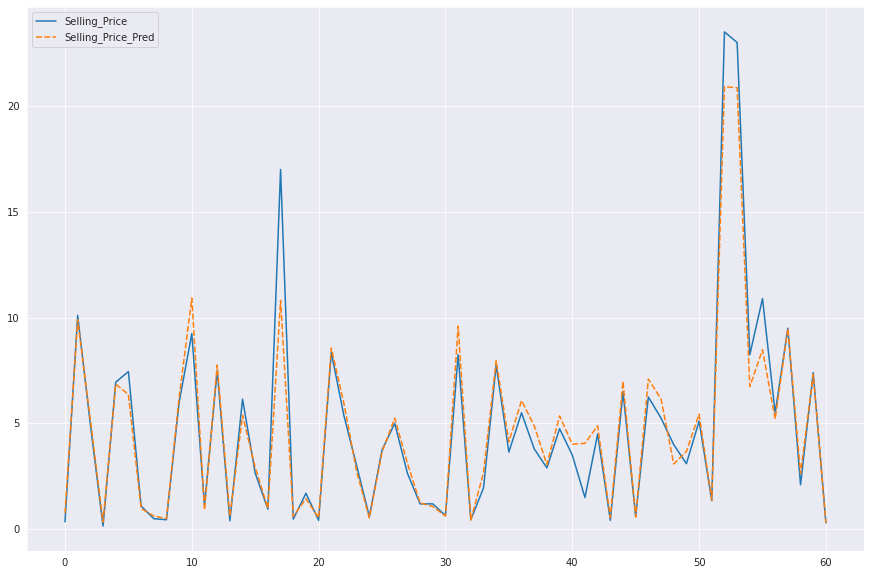

In [47]:
plt.figure(figsize=(15,10))
sns.lineplot(data=model)
plt.show()

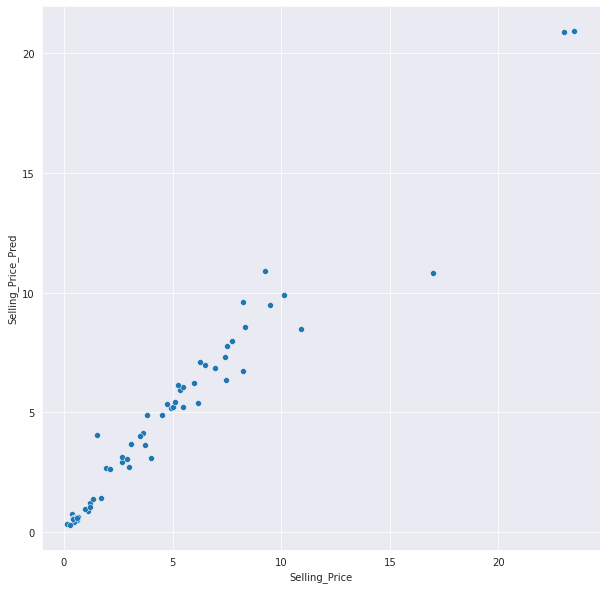

In [48]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = model['Selling_Price'], y=model['Selling_Price_Pred'])
plt.show()

##### The scatter plot above is showing a linear pattern between y_test and predicted values. this also suggests that the values predicted by the model is good. 

<Figure size 1080x720 with 0 Axes>

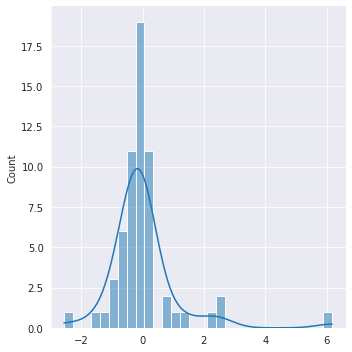

In [49]:
plt.figure(figsize=(15,10))
sns.displot(model['Selling_Price']-model['Selling_Price_Pred'],kde=True)
plt.show()

#### from  above the residual graph looks like a normal curve. this basically suggests that the model we created is a good model. 


In [50]:
results=pd.DataFrame({'Model': MODELALGO,'R Squared': R2,'CV score mean': MODELCV})
results

,Model,R Squared,CV score mean
0,LinearRegression,0.848981,0.849944
1,RidgeRegression,0.837115,0.859422
2,LassoRegression,0.851948,0.847249
3,RandomForestRegression,0.944051,0.854013


# Testing all the above built models 

In [51]:
model_RF = pickle.load(open('RandomForestRegression.pkl', 'rb'))
model_LIN = pickle.load(open('LinearRegression.pkl', 'rb'))
model_RDG = pickle.load(open('RidgeRegression.pkl', 'rb'))
model_LAS = pickle.load(open('LassoRegression.pkl', 'rb'))

In [54]:
Present_Price = 9.54
Kms_Driven = 43000
Owner = 0
age_of_car = datetime.now().year - 2014
Fuel_Type_Diesel = 1
Fuel_Type_Petrol =0 
Seller_Type_Individual = 1
Transmission_Manual = 1

In [56]:
prediction_RF = model_RF.predict([[Present_Price, Kms_Driven, Owner, age_of_car, Fuel_Type_Diesel, Fuel_Type_Petrol,
                                     Seller_Type_Individual, Transmission_Manual]])

prediction_LIN = model_LIN.predict([[Present_Price, Kms_Driven, Owner, age_of_car, Fuel_Type_Diesel, Fuel_Type_Petrol,
                                   Seller_Type_Individual, Transmission_Manual]])

prediction_RDG = model_RDG.predict([[Present_Price, Kms_Driven, Owner, age_of_car, Fuel_Type_Diesel, Fuel_Type_Petrol,
                                     Seller_Type_Individual, Transmission_Manual]])

prediction_LAS = model_LAS.predict([[Present_Price, Kms_Driven, Owner, age_of_car, Fuel_Type_Diesel, Fuel_Type_Petrol,
                                     Seller_Type_Individual, Transmission_Manual]])

output_RF = round(prediction_RF[0], 2)
output_LIN = round(prediction_LIN[0], 2)
output_RDG = round(prediction_RDG[0], 2)
output_LAS = round(prediction_LAS[0], 2)

In [57]:
predictions = 'PREDICTIONS RandomForest: ' + str(output_RF) + ' Linear Regression: ' + str(output_LIN) 
predictions = predictions + ' Ridge Regression: ' + str(output_RDG) + ' Lasso Regression: ' + str(output_LAS)

print(predictions)

PREDICTIONS RandomForest: 6.07 Linear Regression: 6.14 Ridge Regression: 6.11 Lasso Regression: 6.13
